In [1]:
import numpy as np
import cv2
from skimage import data

In [5]:
cat_rgb = data.chelsea()
cat_gray = cv2.cvtColor(cat_rgb, cv2.COLOR_RGB2GRAY)

print("RGB) ndim: {} | shape: {} | dtype: {} | itemsize: {}".format(cat_rgb.ndim, cat_rgb.shape, cat_rgb.dtype, cat_rgb.itemsize))
print("GRAY) ndim: {} | shape: {} | dtype: {} | itemsize: {}".format(cat_gray.ndim, cat_gray.shape, cat_gray.dtype, cat_gray.itemsize))

RGB) ndim: 3 | shape: (300, 451, 3) | dtype: uint8 | itemsize: 1
GRAY) ndim: 2 | shape: (300, 451) | dtype: uint8 | itemsize: 1


In [6]:
cat_hstack = np.hstack((cat_rgb, cat_rgb))
print(cat_hstack.shape)

(300, 902, 3)


In [7]:
import matplotlib.pyplot as plt

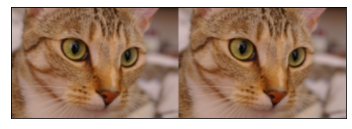

In [11]:
plt.imshow(cat_hstack, interpolation='bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

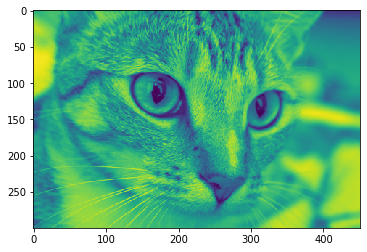

In [9]:
plt.imshow(cat_gray)

## 축을 지정하여 붙이기
`np.concatenate(ndarrays' tuple, axis=0 or 1 or 2)`
* axis=0, 행 추가
* axis=1, 열 추가

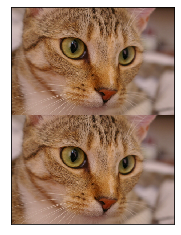

In [12]:
r = np.concatenate((cat_rgb, cat_rgb), axis=0) 
plt.imshow(r)
plt.xticks([])
plt.yticks([])
plt.show()

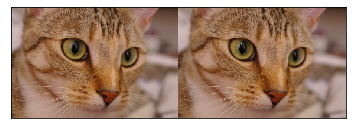

In [14]:
c = np.concatenate((cat_rgb, cat_rgb), axis=1) 
plt.imshow(c)
plt.xticks([])
plt.yticks([])
plt.show()

(300, 451, 6)


TypeError: Invalid shape (300, 451, 6) for image data

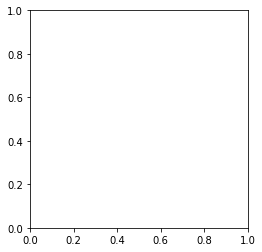

In [15]:
r = np.concatenate((cat_rgb, cat_rgb), axis=2)
print(r.shape)

plt.imshow(r[:,:,:])

(300, 451, 6)


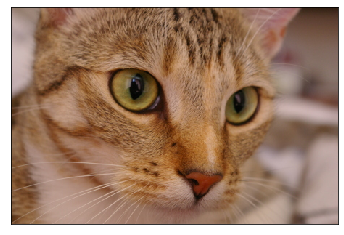

In [16]:
r = np.concatenate((cat_rgb, cat_rgb), axis=2)
print(r.shape)

plt.imshow(r[:,:,:3])
plt.xticks([])
plt.yticks([])
plt.show()

## 새로운 축으로 병합
* ### `stack`

In [17]:
r = np.stack((cat_rgb, cat_rgb), axis=0)
print(r.shape)


(2, 300, 451, 3)


In [18]:
print(cat_rgb[:,:,2].shape)

(300, 451)


In [19]:
r = np.stack((cat_rgb[:,:,2], cat_rgb[:,:,1], cat_rgb[:,:,0]), axis=2)
print(r.shape)



(300, 451, 3)


TypeError: imshow() missing required argument 'mat' (pos 2)

## 수평으로 분리하기
* ### `np.hsplit`


In [20]:
img_hsplit = np.hsplit(cat_rgb[:, :450, :], 3)
print(np.shape(img_hsplit))

(3, 300, 150, 3)


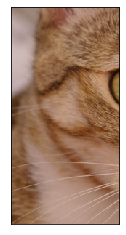

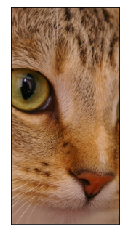

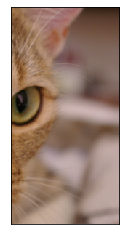

In [21]:
for idx in range(np.shape(img_hsplit)[0]): # len(img_hsplit)
    plt.figure()
    plt.imshow(img_hsplit[idx])
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [22]:
len(img_hsplit)

3

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

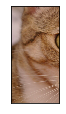

In [23]:
plt.figure(figsize=(4, 7))

plt.subplot(1, 4, 1)
plt.imshow(img_hsplit[0])
plt.xticks([]), plt.yticks([])

## 축을 지정해 분리

In [25]:
img_mono = np.split(cat_rgb, 3, axis=-1)
print(np.shape(img_mono))

(3, 300, 451, 1)


(300, 451, 1)
(300, 451)


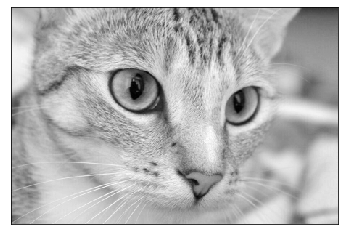

In [26]:
# R
print(img_mono[0].shape)
r = np.squeeze(img_mono[0])
print(r.shape)
plt.imshow(np.squeeze(img_mono[0]), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

(300, 451, 1)
(300, 451)


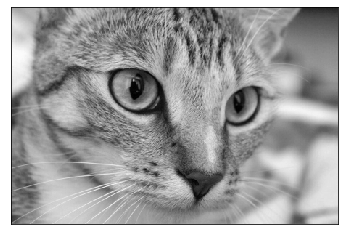

In [27]:
# G
print(img_mono[1].shape)
r = np.squeeze(img_mono[1])
print(r.shape)
plt.imshow(np.squeeze(img_mono[1]), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

(300, 451, 1)
(300, 451)


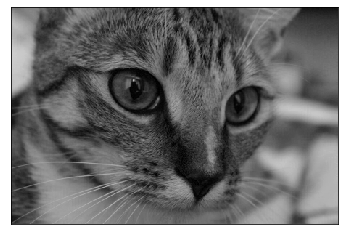

In [28]:
# B
print(img_mono[2].shape)
r = np.squeeze(img_mono[2])
print(r.shape)
plt.imshow(np.squeeze(img_mono[2]), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

## 조건에 의한 Indexing
### True, False로 구성된 ndarray(or mask)를 통한 특정 ndarray에 indexing
`np.where(조건식, [True일 때 값, False일 때 값])`
> 조건식에 True인 인덱스의 tuple 또는 조건식의 결과에 따라 변경된 값으로 채워진 ndarray반환

In [31]:
cat_gray

array([[125, 125, 123, ...,  31,  31,  31],
       [128, 127, 125, ...,  32,  32,  33],
       [131, 130, 128, ...,  33,  34,  35],
       ...,
       [ 65,  78, 105, ..., 152, 152, 152],
       [ 99, 110, 103, ..., 148, 148, 149],
       [110,  96,  94, ..., 143, 143, 144]], dtype=uint8)

(300, 451) <class 'numpy.ndarray'>


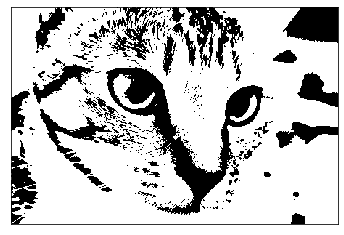

In [30]:
mask = np.where(cat_gray>100, 1, 0)
print(mask.shape, type(mask))
plt.figure()
plt.imshow(mask, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
# 픽셀값이 100을 넘는 것을 하얗게 처리

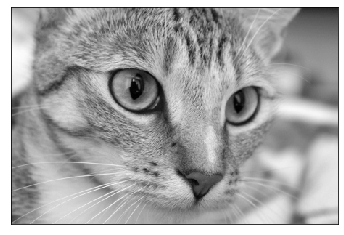

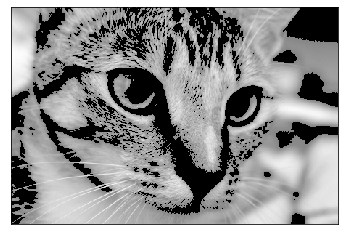

In [35]:
plt.imshow(cat_gray, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
r = cat_gray*mask
plt.figure()
plt.imshow(r, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

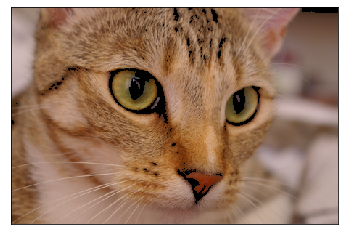

In [32]:
r = cat_rgb.copy()
r[cat_gray<50] = (0,0,0)
plt.figure()
plt.imshow(r)
plt.xticks([])
plt.yticks([])
plt.show()

In [29]:
mask2 = np.where(cat_gray>100)
print(len(mask2))
mask2

2


(array([  0,   0,   0, ..., 299, 299, 299], dtype=int64),
 array([  0,   1,   2, ..., 448, 449, 450], dtype=int64))

## 통계적 처리
* np.mean()
* np.max()
* np.min()

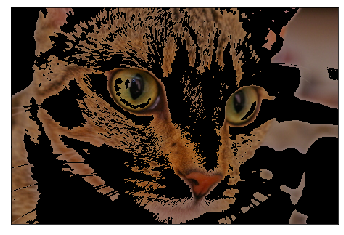

In [43]:
g_m = np.mean(cat_gray)
rgb_copy = cat_rgb.copy()
rgb_copy[cat_gray>g_m] = (0,0,0)
plt.figure()
plt.imshow(rgb_copy)
plt.xticks([])
plt.yticks([])
plt.show()